# EDA - Psiquiatria Doctoralia 
* 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('./dados/output.jl', lines=True)
df.head(5)

,doctor_id,name1,name2,city1,city2,region,specialization,reviews,newest_review_date,telemedicine,price,url,fetch_time
0,804446,Dra. Amanda Sardinha,Amanda Sardinha,São Paulo,sao-paulo,sao-paulo-sp,psiquiatra,24.0,2023-12-19T16:20:42-03:00,1,600,http://www.doctoralia.com.br/amanda-sardinha,2024-02-29 14:55:23
1,197095,Dra. Eusaline Soares Siqueira,Eusaline Soares Siqueira,Taguatinga,taguatinga,distrito-federal-df,psiquiatra,64.0,2024-01-31T17:28:23-03:00,1,400,http://www.doctoralia.com.br/eusaline-soares-s...,2024-02-29 14:55:23
2,756306,Dra. Darcya Lourenço,Darcya Lourenço,Santos,santos,sao-paulo-sp,psiquiatra,367.0,2024-02-28T21:08:28-03:00,1,500,http://www.doctoralia.com.br/darcya-lourenco,2024-02-29 14:55:23
3,55706,Dr. Thales Paim,Thales Paim,São Paulo,sao-paulo,sao-paulo-sp,psiquiatra,454.0,2024-02-28T20:18:47-03:00,1,500,http://www.doctoralia.com.br/thales-paim,2024-02-29 14:55:23
4,794039,Dra. Luciana Oliva,Luciana Oliva,Salvador,salvador,bahia-ba,psiquiatra,37.0,2024-02-07T14:01:33-03:00,1,500,http://www.doctoralia.com.br/luciana-oliva,2024-02-29 14:55:23


In [3]:
df_plot.head(10)

NameError: name 'df_plot' is not defined

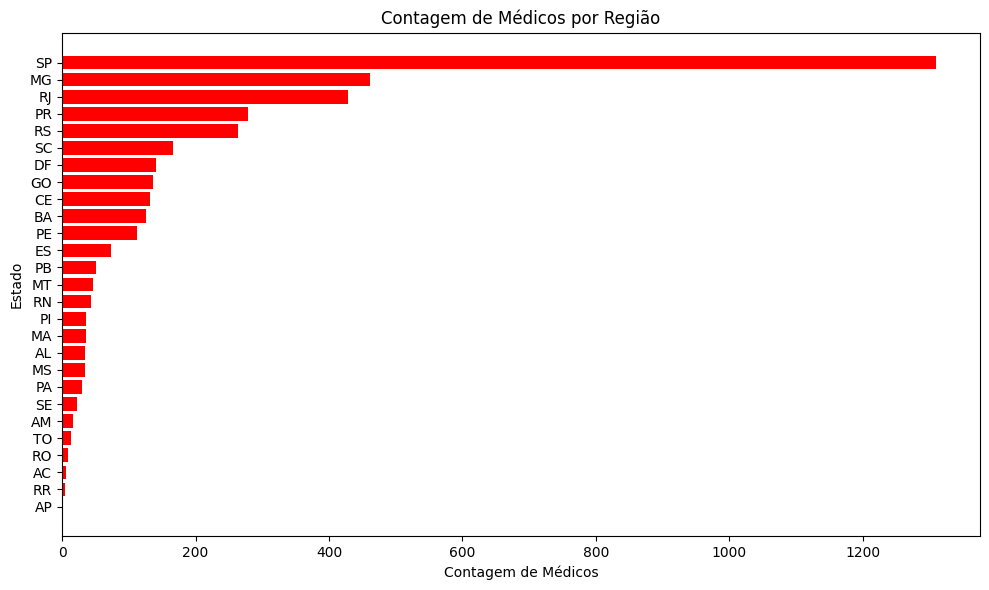

In [4]:
df_plot = (df
 .query('region != ""')
 .groupby(df['region'])
 .agg({"doctor_id":"count"})
 .reset_index()
 .sort_values(by = 'doctor_id', ascending=True)
 )

df_plot['uf'] = df_plot['region'].str.split('-').str[-1].str.upper()

plt.figure(figsize=(10,6))
plt.barh(df_plot['uf'], df_plot['doctor_id'], color='red')
plt.ylabel('Estado')
plt.xlabel('Contagem de Médicos')
plt.title('Contagem de Médicos por Região')
plt.tight_layout()
plt.show()

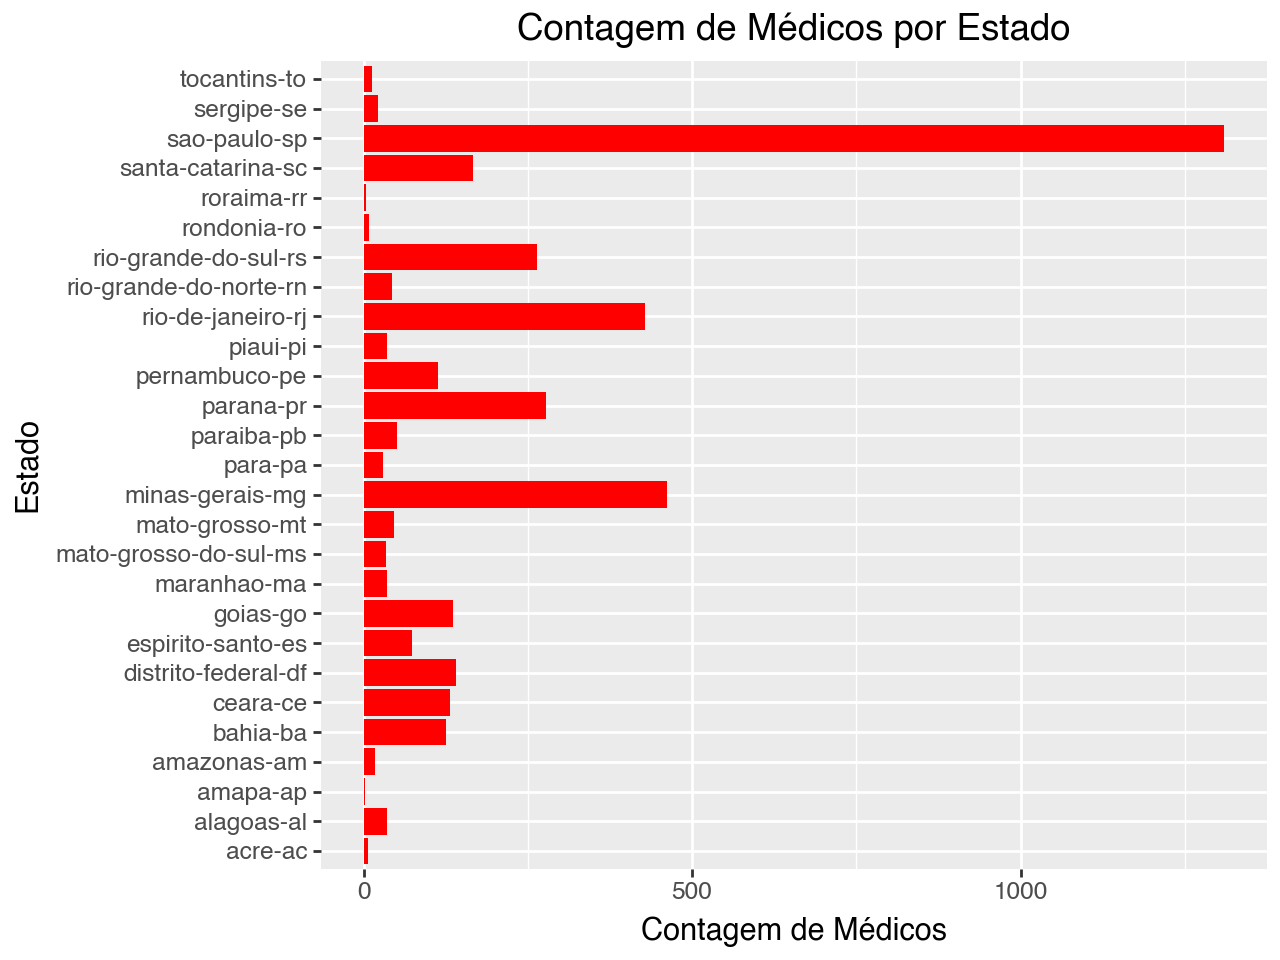

In [13]:
from plotnine import ggplot, aes, geom_bar, labs, coord_flip
df_plot = (df
 .query('region != ""')
 .groupby(df['region'])
 .agg({"doctor_id":"count"})
 .reset_index()
 .sort_values(by = 'doctor_id', ascending=True)
 )


(ggplot(df_plot)
 + aes(x='region', y='doctor_id')
 + geom_bar(stat='identity', fill='red')
 + coord_flip() 
 + labs(x='Estado', y='Contagem de Médicos', title='Contagem de Médicos por Estado') 
)

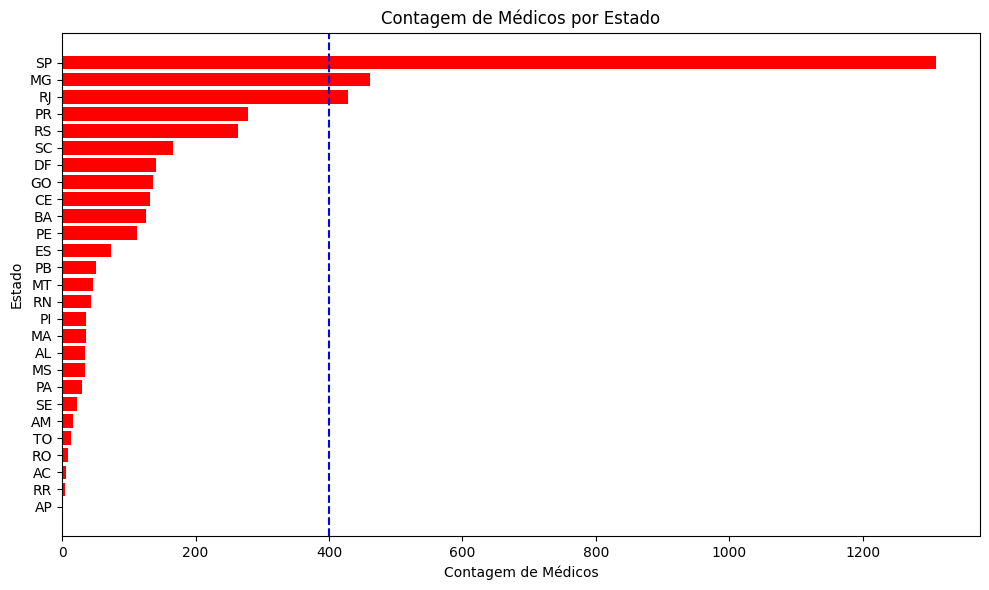

In [9]:

plt.figure(figsize=(10,6))
plt.barh(df_plot['uf'], df_plot['doctor_id'], color='red')
plt.axvline(x=400, color='blue', linestyle='--')
plt.ylabel('Estado')
plt.xlabel('Contagem de Médicos')
plt.title('Contagem de Médicos por Estado')
plt.tight_layout()
plt.show()

